### CIFAR100

In [1]:
#기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 데이터 준비

#### CIFAR100

https://m.blog.naver.com/seodaewoo/222047132190

In [4]:
def draw_img(x) :
  plt.figure()
  plt.imshow(x)
  plt.show()

In [5]:
from tensorflow.keras.datasets.cifar100 import load_data

In [6]:
(cx_train, cy_train), (cx_test, cy_test) = load_data(label_mode="fine")
cx_train, cx_test = cx_train/255.0, cx_test/255.0

169001437/169001437 [==============================] - 16s 0us/step


In [7]:
classes = [
    '사과', '수족관 물고기', '아기', '곰', '비버', '침대', '꿀벌', '딱정벌레',
    '자전거', '병', '그릇', '소년', '다리', '버스', '나비', '낙타',
    '캔', '성', '애벌레', '소', '의자', '침팬지', '시계',
    '구름','바퀴벌레','소파','게','악어','컵','공룡',
    '돌고래', '코끼리', '가자미','숲','여우','소녀','햄스터',
    '집', '캥거루', '키보드', '램프', '잔디깎기', '표범', '사자',
    '도마뱀', '랍스터', '사람', '매이플트리', '오토바이', '산', '마우스',
    '버섯', '오크트리', '오렌지', '난초', '수달', '팜트리', '배',
    '픽업트럭', '소나무', '평지', '접시', '양귀비', '호저',
    '주머니쥐', '토끼', '너구리', '레이', '도로', '로켓', '장미',
    '바다', '인감', '상어', '뒤쥐', '스컹크', '고층건물', '달팽이', '뱀',
    '거미', '다람쥐', '전차', '해바라기', '단고추', '테이블',
    '탱크', '전화', '텔레비전', '호랑이', '트랙터', '기차', '송어',
    '튤립', '거북이', '옷장', '고래', '버드나무', '늑대', '여자',
    '벌레'
]

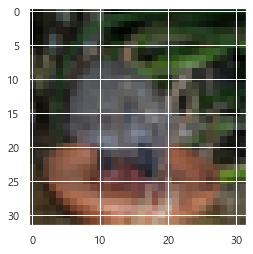

호저


In [12]:
idx = np.random.randint(0,9999)
draw_img(cx_test[idx])
print(classes[cy_test[idx][0]])

In [14]:
import tensorflow as tf

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), kernel_initializer='he_uniform', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), kernel_initializer='he_uniform', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), kernel_initializer='he_uniform', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(100, activation='softmax'))
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True) # https://www.tensorflow.org/tutorials/images/segmentation?hl=ko

Model: "sequential"


c:\DEV\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (

In [16]:
history = model.fit(cx_train, cy_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 129s 82ms/step - loss: 4.0312 - accuracy: 0.0948
Epoch 2/5
 198/1563 [==>...........................] - ETA: 1:46 - loss: 3.4947 - accuracy: 0.1744

KeyboardInterrupt: 